## Import Necessary Libraries

In [3]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels as sm
from sklearn.feature_selection import f_regression
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning

pd.set_option('display.max_columns', 100)

sns.set()
warnings.filterwarnings('ignore',category = FutureWarning)
warnings.filterwarnings('ignore',category = DataConversionWarning)

## Open Preprocessed Data

In [4]:
data = pd.read_csv('Preprocessed Data.csv')
data.drop(columns= ['Gender','Race'],inplace=True)
data.set_index('SEQN', inplace=True)

In [5]:
data.head()

,Age,Weight,Height,BMI,Upper Leg Length,Upper Arm Length,Arm Circumference,Waist Circumference,Hip Circumference,Male,Female,Hispanic,White,Black,Asian,Other/Multi
SEQN,,,,,,,,,,,,,,,,
93705.0,66.0,79.5,158.3,31.7,37.0,36.0,32.0,101.8,110.0,0,1,0,0,1,0,0
93706.0,18.0,66.3,175.7,21.5,46.6,38.8,27.0,79.3,94.4,1,0,0,0,0,1,0
93707.0,13.0,45.4,158.4,18.1,38.1,33.8,21.5,64.1,83.0,1,0,0,0,0,0,1
93708.0,66.0,53.5,150.2,23.7,31.8,30.6,27.4,88.2,90.1,0,1,0,0,0,1,0
93709.0,75.0,88.8,151.1,38.9,31.9,36.0,38.1,113.0,131.3,0,1,0,0,1,0,0


In [6]:
data.describe()

,Age,Weight,Height,BMI,Upper Leg Length,Upper Arm Length,Arm Circumference,Waist Circumference,Hip Circumference,Male,Female,Hispanic,White,Black,Asian,Other/Multi
count,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000
mean,44.485078,79.675805,166.172467,28.707452,39.233215,37.158203,32.606104,97.400287,104.987945,0.491654,0.508346,0.231496,0.338392,0.232339,0.140111,0.057663
std,20.980813,22.496212,10.091547,7.144445,3.836443,2.858324,5.482020,17.949110,14.404761,0.499972,0.499972,0.421824,0.473202,0.422359,0.347132,0.233125
min,12.000000,29.400000,134.000000,13.200000,25.000000,27.500000,17.600000,55.200000,66.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,63.500000,158.700000,23.700000,36.600000,35.000000,28.700000,84.400000,95.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.500000,165.700000,27.800000,39.200000,37.000000,32.300000,96.500000,103.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,92.300000,173.500000,32.700000,41.900000,39.000000,36.100000,108.700000,112.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,80.000000,191.400000,197.700000,65.300000,55.000000,49.900000,56.300000,169.500000,179.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


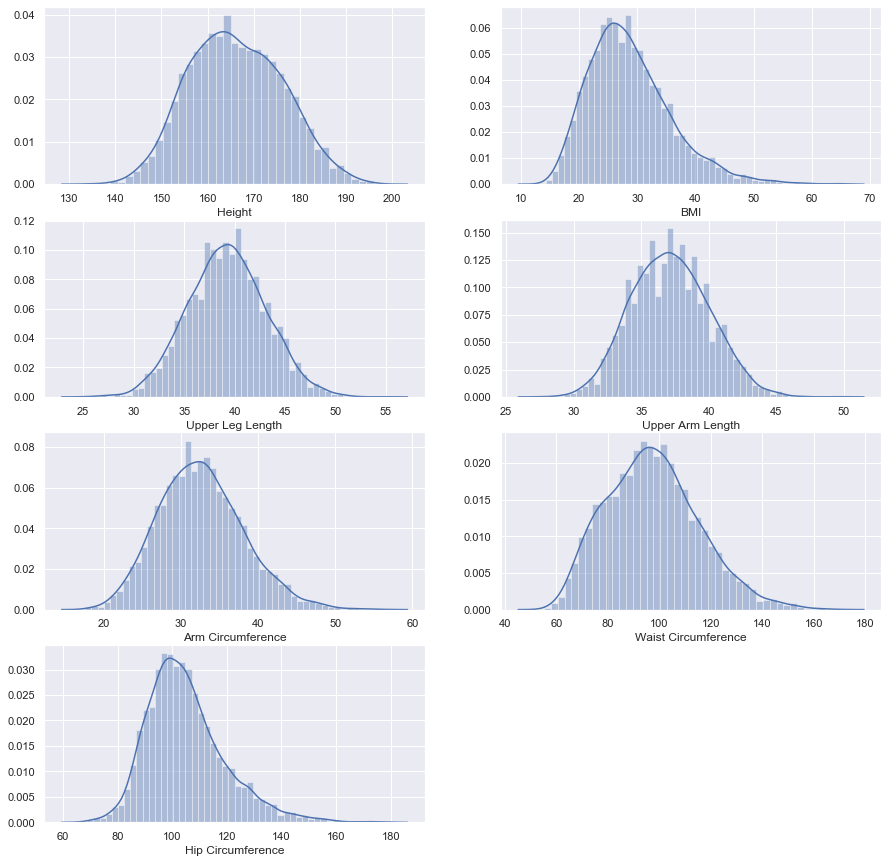

In [7]:
plt.figure(figsize = (15,15))

plt.subplot(4,2,1)
sns.distplot(data['Height'], kde=True)

plt.subplot(4,2,2)
sns.distplot(data['BMI'])

plt.subplot(4,2,3)
sns.distplot(data['Upper Leg Length'])

plt.subplot(4,2,4)
sns.distplot(data['Upper Arm Length'])

plt.subplot(4,2,5)
sns.distplot(data['Arm Circumference'])

plt.subplot(4,2,6)
sns.distplot(data['Waist Circumference'])

plt.subplot(4,2,7)
sns.distplot(data['Hip Circumference'])

plt.show()



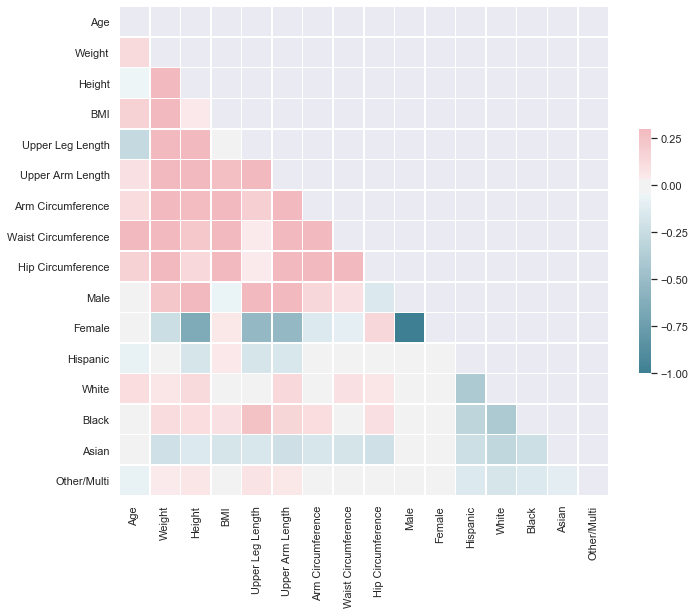

In [8]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Create Reference Categories

In [9]:
ref_categories = ['Male','Other/Multi']
filtercol = []

## Split Data

In [10]:
data_train, data_test = train_test_split(data,test_size=0.2, random_state=42)

In [11]:
x_w_ref_categories = data_train[['Male','Female','Age','Hispanic','White','Black','Asian','Other/Multi','Height','BMI','Upper Leg Length','Upper Arm Length','Arm Circumference','Waist Circumference','Hip Circumference']]
x = x_w_ref_categories.drop(ref_categories, axis=1)
y = data_train[['Weight']]
print(x)
print(y)

          Female   Age  Hispanic  White  Black  Asian  Height   BMI  \
SEQN                                                                  
101915.0       1  69.0         0      1      0      0   161.5  38.9   
102456.0       1  29.0         0      0      0      0   156.6  42.7   
94679.0        0  63.0         1      0      0      0   173.9  31.2   
94335.0        0  69.0         0      0      0      1   160.9  28.3   
97729.0        1  16.0         0      1      0      0   159.4  43.1   
102644.0       0  53.0         0      1      0      0   174.9  29.6   
97456.0        1  38.0         0      0      1      0   169.7  26.5   
97997.0        1  70.0         0      1      0      0   153.5  31.8   
96362.0        1  61.0         0      1      0      0   159.9  27.3   
95896.0        1  32.0         0      0      1      0   177.7  21.1   
94968.0        0  24.0         0      0      1      0   195.0  21.7   
95342.0        1  31.0         0      1      0      0   163.7  21.6   
97191.

In [56]:
reg = LinearRegression()
reg.fit(x, y)

coef = reg.coef_
coef = coef.reshape((13,1))
intercept = reg.intercept_
r2 = reg.score(x, y)
n = 4744
p = 13
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('R-Squared:        ', r2)
print('Adjusted R-Squred:', adj_r2)
print('Intercept:        ', intercept)
print(' ')
print('The Model')

f_regression(x,y)
p_values = f_regression(x,y)[1].round(3)

reg_summary = pd.DataFrame(data=x.columns.values,columns=['Features'])
reg_summary.set_index('Features', inplace=True)
reg_summary['Coefficients'] = coef
reg_summary['P-Values'] = p_values
print(reg_summary)

R-Squared:         0.9895779195248683
Adjusted R-Squred: 0.9895492753290592
Intercept:         [-154.83296972]
 
The Model
                     Coefficients  P-Values
Features                                   
Female                   0.303116     0.000
Age                     -0.019261     0.000
Hispanic                -0.335036     0.022
White                   -0.129222     0.000
Black                   -0.234129     0.000
Asian                    0.266929     0.000
Height                   0.929208     0.000
BMI                      2.667483     0.000
Upper Leg Length         0.060370     0.000
Upper Arm Length        -0.028774     0.000
Arm Circumference        0.014908     0.000
Waist Circumference      0.106164     0.000
Hip Circumference       -0.073928     0.000


In [13]:
x2_w_ref_categories = data_test[['Male','Female','Age','Hispanic','White','Black','Asian','Other/Multi','Height','BMI','Upper Leg Length','Upper Arm Length','Arm Circumference','Waist Circumference','Hip Circumference']]
x2 = x2_w_ref_categories.drop(ref_categories, axis=1)
y2 = data_test[['Weight']]

In [14]:
y_hat_test = reg.predict(x2)
# print(y_hat_test)

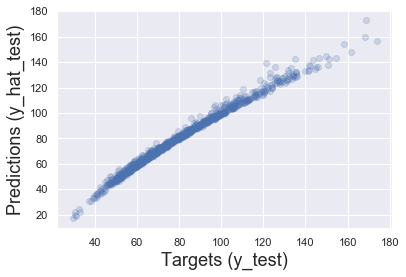

In [17]:
plt.scatter(y2,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [23]:
prediction_actual_comp = pd.DataFrame()
prediction_actual_comp = y2[:]
prediction_actual_comp['Predicted'] = y_hat_test[:]
prediction_actual_comp['Residual'] = prediction_actual_comp['Weight'] - prediction_actual_comp['Predicted']
prediction_actual_comp['Diff%'] = np.absolute(prediction_actual_comp['Residual']/prediction_actual_comp['Weight']*100)
prediction_actual_comp

,Weight,Predicted,Residual,Diff%
SEQN,,,,
96086.0,110.9,108.536682,2.363318,2.131035
96063.0,52.1,51.602841,0.497159,0.954239
99306.0,51.1,54.588636,-3.488636,6.827076
101662.0,95.6,94.997768,0.602232,0.629950
99199.0,56.4,59.262299,-2.862299,5.074999
96563.0,40.9,36.246429,4.653571,11.377924
95690.0,75.1,76.101893,-1.001893,1.334079
100346.0,52.2,48.945029,3.254971,6.235577
101379.0,60.0,60.076354,-0.076354,0.127257


In [24]:
prediction_actual_comp.describe()

,Weight,Predicted,Residual,Diff%
count,1187.000000,1187.000000,1187.000000,1187.000000
mean,79.775063,79.774494,0.000569,2.320487
std,22.666205,22.630996,2.550186,3.214040
min,29.400000,17.428714,-17.902955,0.000775
25%,63.300000,63.668511,-1.232147,0.703536
50%,76.500000,77.640317,-0.350298,1.514513
75%,93.050000,93.683126,0.993158,2.733087
max,174.000000,172.648350,17.244971,40.718659
